In [1]:
import pandas as pd

In [2]:
# get the filtered dataset
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/built_dataset.csv')
df.sample(3)

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
443602,Niushou Youcai,Flower/Leaf Vegetables,2022-02-03,0.530,4.0,sale,No
307218,Naibaicai,Flower/Leaf Vegetables,2021-07-10,0.553,4.0,sale,No
498364,Eggplant,Solanum,2022-05-28,0.319,6.0,sale,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737337 entries, 0 to 737336
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    737337 non-null  object 
 1   Category Name                737337 non-null  object 
 2   Date                         737337 non-null  object 
 3   Quantity Sold (kilo)         737337 non-null  float64
 4   Unit Selling Price (RMB/kg)  737337 non-null  float64
 5   Sale or Return               737337 non-null  object 
 6   Discount (Yes/No)            737337 non-null  object 
dtypes: float64(2), object(5)
memory usage: 39.4+ MB


In [4]:
import numpy as np

In [5]:
# average frequecy of selling item
np.average(df['Item Name'].value_counts())

3860.4031413612565

In [6]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x168b62fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x168b82550>,
 'boxes': [<matplotlib.lines.Line2D at 0x168b62d30>],
 'medians': [<matplotlib.lines.Line2D at 0x168b82a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x168b82d30>],
 'means': []}

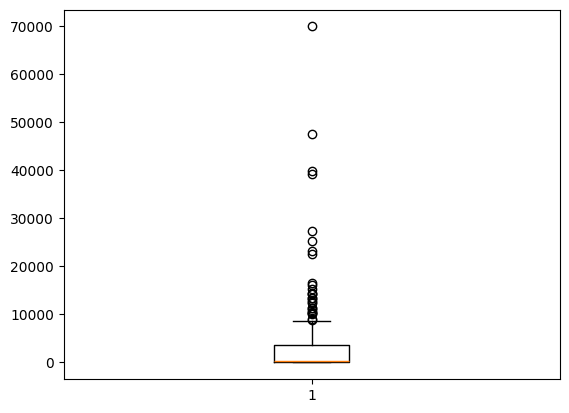

In [7]:
# visualise frequecy of selling item
plt.boxplot(df['Item Name'].value_counts())

In [8]:
# average frequency of selling category
np.average(df['Category Name'].value_counts())

122889.5

{'whiskers': [<matplotlib.lines.Line2D at 0x168c40e80>,
 'caps': [<matplotlib.lines.Line2D at 0x168c50400>,
 'boxes': [<matplotlib.lines.Line2D at 0x168c40be0>],
 'medians': [<matplotlib.lines.Line2D at 0x168c50940>],
 'fliers': [<matplotlib.lines.Line2D at 0x168c50be0>],
 'means': []}

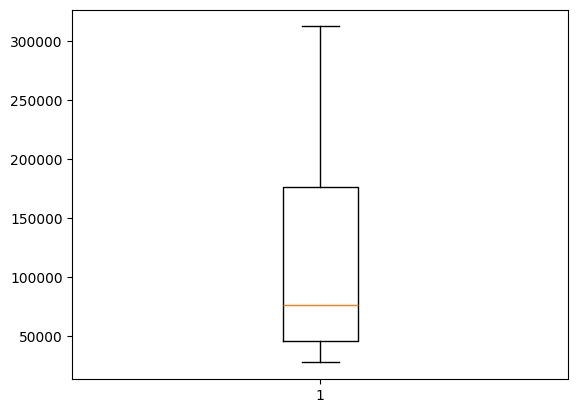

In [9]:
# visualise frequency of selling category
plt.boxplot(df['Category Name'].value_counts())

In [10]:
df.head()

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,Paopaojiao,Capsicum,2020-07-01,0.396,7.6,sale,No
1,Paopaojiao,Capsicum,2020-07-01,0.409,7.6,sale,No
2,Shanghaiqing,Flower/Leaf Vegetables,2020-07-01,0.421,10.0,sale,No
3,Caixin,Flower/Leaf Vegetables,2020-07-01,0.539,8.0,sale,No
4,Paopaojiao,Capsicum,2020-07-01,0.277,7.6,sale,No


{'whiskers': [<matplotlib.lines.Line2D at 0x168cacb20>,
 'caps': [<matplotlib.lines.Line2D at 0x168cbe0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168cac880>],
 'medians': [<matplotlib.lines.Line2D at 0x168cbe5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168cbe880>],
 'means': []}

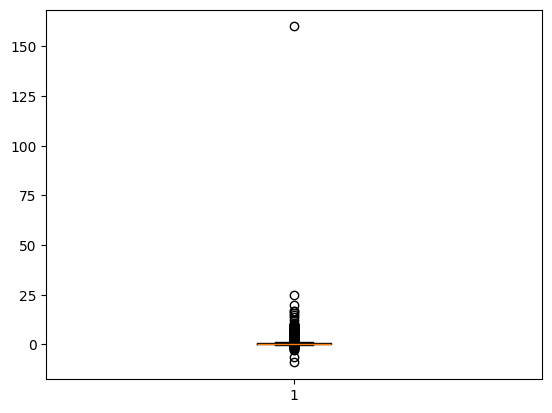

In [11]:
# check for outliers
plt.boxplot(df['Quantity Sold (kilo)'])

In [12]:
# check the - values of sold amount are returned values
(df['Quantity Sold (kilo)'] < 0).sum() == (df['Sale or Return'] == 'return').sum()

True

In [13]:
# remove non-dependent values for the prediction
df = df[~(df['Sale or Return'] == 'return')]
df = df.drop(columns=['Sale or Return', 'Discount (Yes/No)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736947 entries, 0 to 737336
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    736947 non-null  object 
 1   Category Name                736947 non-null  object 
 2   Date                         736947 non-null  object 
 3   Quantity Sold (kilo)         736947 non-null  float64
 4   Unit Selling Price (RMB/kg)  736947 non-null  float64
dtypes: float64(2), object(3)
memory usage: 33.7+ MB


In [14]:
np.mean(df['Quantity Sold (kilo)'])

0.5004181643998823

In [15]:
# round up sold amount to first decimal place
df['Quantity Sold (kilo)'] = round(df['Quantity Sold (kilo)'], 1)

In [16]:
# check the change of mean
np.mean(df['Quantity Sold (kilo)'])

0.5024228336637506

In [17]:
# check date range
df['Date'].min(), df['Date'].max()

('2020-07-01', '2023-06-30')

In [18]:
# select 2 year range of data
df = df[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2022-12-31')]
df.shape

(475174, 5)

In [19]:
df.head()

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
159706,Green Hot Peppers,Capsicum,2021-01-01,1.1,25.8
159707,Green Hot Peppers,Capsicum,2021-01-01,0.6,25.8
159708,Yunnan Lettuces,Flower/Leaf Vegetables,2021-01-01,0.5,6.0
159709,Xixia Mushroom,Edible Mushroom,2021-01-01,0.4,18.0
159710,Paopaojiao,Capsicum,2021-01-01,0.6,18.0


In [20]:
# group dataset by item name, category and date
df = df.groupby(['Item Name', 'Category Name', 'Date']).mean().reset_index()
df.head()

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
0,7 Colour Pepper,Capsicum,2021-01-01,0.3875,18.0
1,7 Colour Pepper,Capsicum,2021-01-02,0.4250,19.8
2,7 Colour Pepper,Capsicum,2021-01-03,0.5000,19.8
3,7 Colour Pepper,Capsicum,2021-01-04,0.5000,19.8
4,7 Colour Pepper,Capsicum,2021-01-05,0.3500,19.8


{'whiskers': [<matplotlib.lines.Line2D at 0x168d4e2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x168d4e7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168d3efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x168d4ed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x168d4efd0>],
 'means': []}

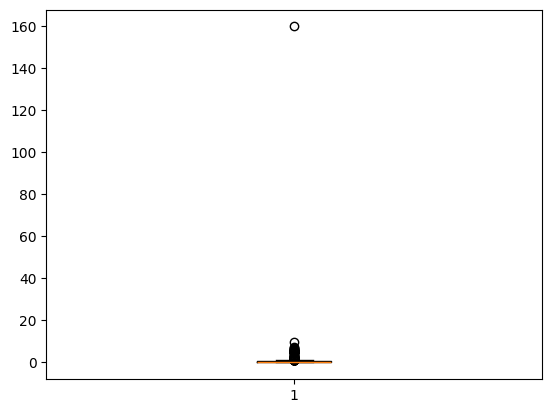

In [21]:
# check for sold amount outliers
plt.boxplot(df['Quantity Sold (kilo)'])

In [22]:
(df['Quantity Sold (kilo)'] > 20).sum(), (df['Quantity Sold (kilo)'] < 0).sum()

(1, 0)

In [23]:
np.mean(df['Quantity Sold (kilo)'])

0.5431013179613663

In [24]:
# handle outliers with mean values
df['Quantity Sold (kilo)'] = np.where(df['Quantity Sold (kilo)'] > 20, np.mean(df['Quantity Sold (kilo)']), df['Quantity Sold (kilo)'])
np.mean(df['Quantity Sold (kilo)']), df['Quantity Sold (kilo)'].max()

(0.5368647371305606, 9.6)

{'whiskers': [<matplotlib.lines.Line2D at 0x168dc8220>,
 'caps': [<matplotlib.lines.Line2D at 0x168dc8760>,
 'boxes': [<matplotlib.lines.Line2D at 0x128d79af0>],
 'medians': [<matplotlib.lines.Line2D at 0x168dc8ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168dc8f40>],
 'means': []}

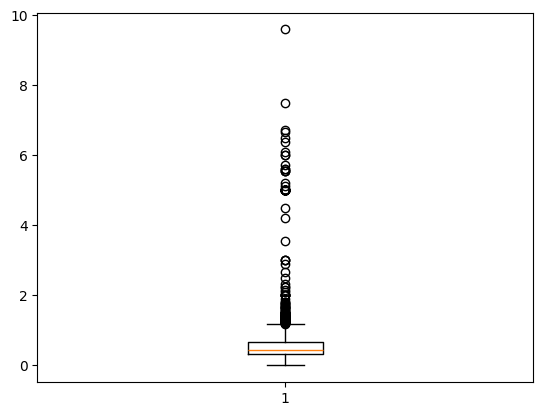

In [25]:
# visualise processed sold amount
plt.boxplot(df['Quantity Sold (kilo)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x168e36550>,
 'caps': [<matplotlib.lines.Line2D at 0x168e36a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x168e362b0>],
 'medians': [<matplotlib.lines.Line2D at 0x168e36fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168e442b0>],
 'means': []}

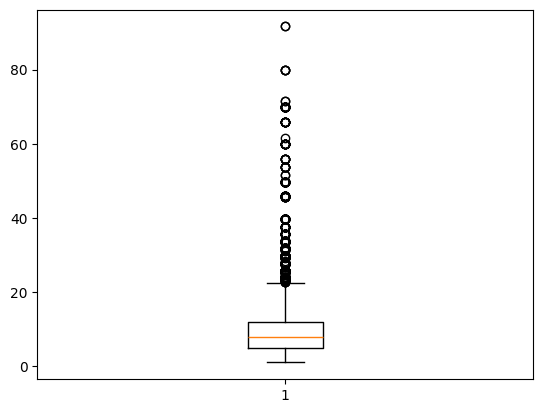

In [26]:
plt.boxplot(df['Unit Selling Price (RMB/kg)'])

In [27]:
df.sample(3)

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
16758,Red Pepper,Capsicum,2021-10-09,0.225,12.0
6899,Green Line Pepper,Capsicum,2021-07-20,0.120,6.0
5949,Green Hang Pepper,Capsicum,2022-07-27,1.000,2.9


In [28]:
# drop non-dependent columns
df = df.drop(columns='Date')

In [29]:
# view co-relation between price and sold amount
df.iloc[:,[2, 3]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
Quantity Sold (kilo),1.000000,-0.414973
Unit Selling Price (RMB/kg),-0.414973,1.000000


In [30]:
# one hot encoding
df = pd.get_dummies(df)
df.shape

(25568, 185)

In [31]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Basil,Item Name_Bell Pepper,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
24318,0.510870,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21305,0.377778,4.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
623,0.390909,12.0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
14741,1.276471,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5825,0.925000,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
# save pre-processed dataset
df.to_csv("/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv", index=False)